In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math
import joblib

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

plt.rcParams['savefig.dpi'] = 144 

In [2]:
df = pd.read_csv("data/processing_car.csv")
df.head()

,Price,CarBrand,CarModel,MfgDate,Mileage,Condition,GearBox,Fuel,CarOrigin,CarType,CarSeats
0,9.400000e+08,Vinfast,VF8,2023.0,0.0,Mới,Tự động,Điện,Việt Nam,SUV,5.0
1,9.990000e+08,Hyundai,Santa Fe,2021.0,20000.0,Đã sử dụng,Tự động,Xăng,Việt Nam,SUV,7.0
2,1.058000e+09,Hyundai,Santa Fe,2021.0,24000.0,Đã sử dụng,Tự động,Dầu,Việt Nam,SUV,7.0
3,4.600000e+08,Mazda,3,2018.0,44658.0,Đã sử dụng,Tự động,Xăng,Việt Nam,Sedan,5.0
4,4.150000e+08,Lexus,GS,2007.0,135000.0,Đã sử dụng,Tự động,Xăng,Mỹ,Sedan,4.0


In [17]:
df['CarBrand'].value_counts()

CarBrand
Toyota           2503
Ford             1591
Hyundai          1461
Kia              1417
Mitsubishi        736
Mazda             704
Honda             633
Mercedes Benz     592
Chevrolet         402
Suzuki            297
Vinfast           286
Nissan            165
BMW               137
Peugeot           128
MG                 95
Lexus              84
Audi               71
Daewoo             67
Volkswagen         48
Isuzu              42
LandRover          28
Subaru             24
Porsche            20
Mini               10
Haval               8
Ssangyong           7
Volvo               7
Acura               6
Renault             5
Infiniti            5
Jeep                4
Fiat                4
Luxgen              4
Bentley             4
Smart               4
Daihatsu            3
Haima               3
Jaguar              3
Gaz                 2
Cadillac            2
Rover               1
Zotye               1
Lifan               1
HongQi              1
UAZ                 1
D

In [3]:
df.describe()

,Price,MfgDate,Mileage,CarSeats
count,1.170600e+04,11706.000000,11706.000000,11706.000000
mean,5.473725e+08,2017.254314,56880.796087,5.706561
std,3.155316e+08,5.149171,64203.814972,1.693444
min,1.030000e+08,2000.000000,0.000000,2.000000
25%,3.260000e+08,2015.000000,11000.000000,5.000000
50%,4.850000e+08,2019.000000,48000.000000,5.000000
75%,6.900000e+08,2021.000000,84000.000000,7.000000
max,1.890000e+09,2023.000000,999999.000000,16.000000


In [4]:


y = df['Price']
df = df.drop('Price', axis=1)


# Chọn các cột dữ liệu phân loại cần mã hóa
categorical_columns = ['CarBrand', 'CarModel', 'Condition', 'GearBox', 'Fuel', 'CarOrigin', 'CarType']
df[categorical_columns] = df[categorical_columns].apply(lambda x: x.str.lower())

df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)


X_train, X_test, y_train, y_test = train_test_split(df, y, train_size=0.8, random_state=42)

In [5]:
encoded_columns = df.columns
encoded_columns


Index(['MfgDate', 'Mileage', 'CarSeats', 'CarBrand_asia', 'CarBrand_audi',
       'CarBrand_bentley', 'CarBrand_bmw', 'CarBrand_cadillac',
       'CarBrand_chevrolet', 'CarBrand_chrysler',
       ...
       'CarOrigin_đài loan', 'CarOrigin_đức', 'CarOrigin_ấn độ',
       'CarType_hatchback', 'CarType_mpv', 'CarType_mui trần',
       'CarType_pick up', 'CarType_sedan', 'CarType_suv', 'CarType_van'],
      dtype='object', length=414)

In [6]:
joblib.dump(encoded_columns, 'models/encoded_columns.pkl')


['models/encoded_columns.pkl']

In [7]:
model = RandomForestRegressor()
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 1, 2, 3],
}

# Tạo đối tượng GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_absolute_error', cv=5)
# Fit mô hình trên tập train và validation
grid_search.fit(X_train, y_train)
# In ra siêu tham số tốt nhất và điểm số tương ứng
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Score (Negative MAE): ", grid_search.best_score_)

Best Hyperparameters:  {'max_depth': None, 'n_estimators': 200}
Best Score (Negative MAE):  -59886926.17431585


In [10]:
# Lấy tất cả các tham số của mô hình
model_params = model.get_params()

# In ra các tham số và giá trị tương ứng
for param, value in model_params.items():
    print(f"{param}: {value}")

bootstrap: True
ccp_alpha: 0.0
criterion: squared_error
max_depth: None
max_features: 1.0
max_leaf_nodes: None
max_samples: None
min_impurity_decrease: 0.0
min_samples_leaf: 1
min_samples_split: 2
min_weight_fraction_leaf: 0.0
n_estimators: 200
n_jobs: None
oob_score: False
random_state: None
verbose: 0
warm_start: False


MAE: 55156430.28851
RMSE: 113768593.48373
MAPE: 0.12806
R2_SQUARE: 0.87771


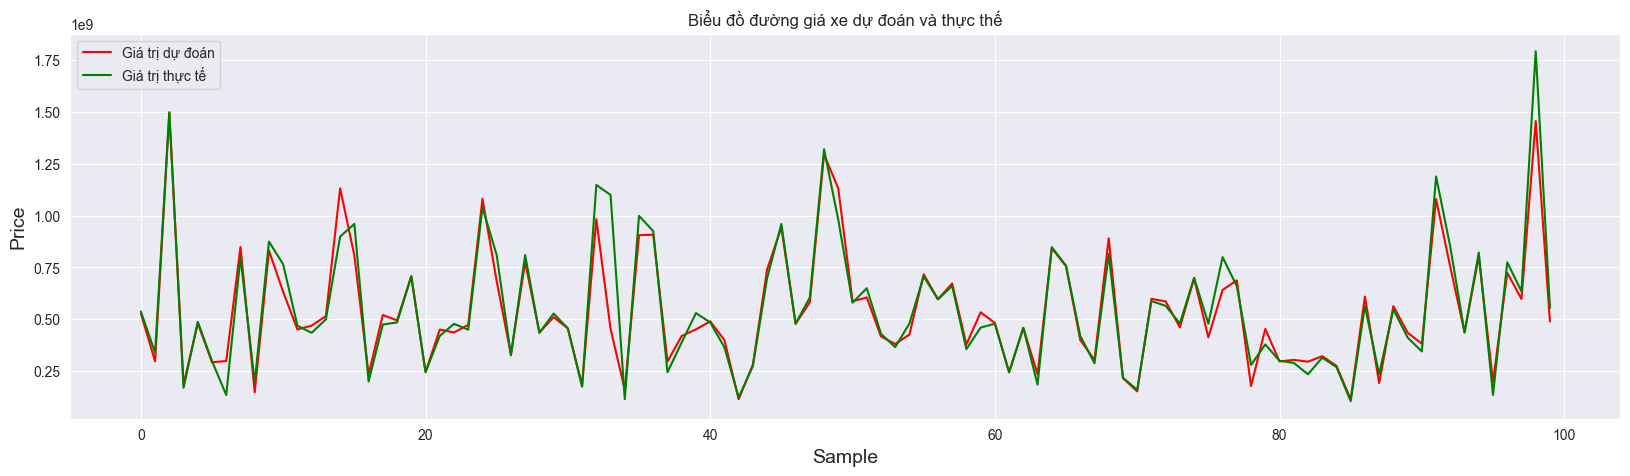

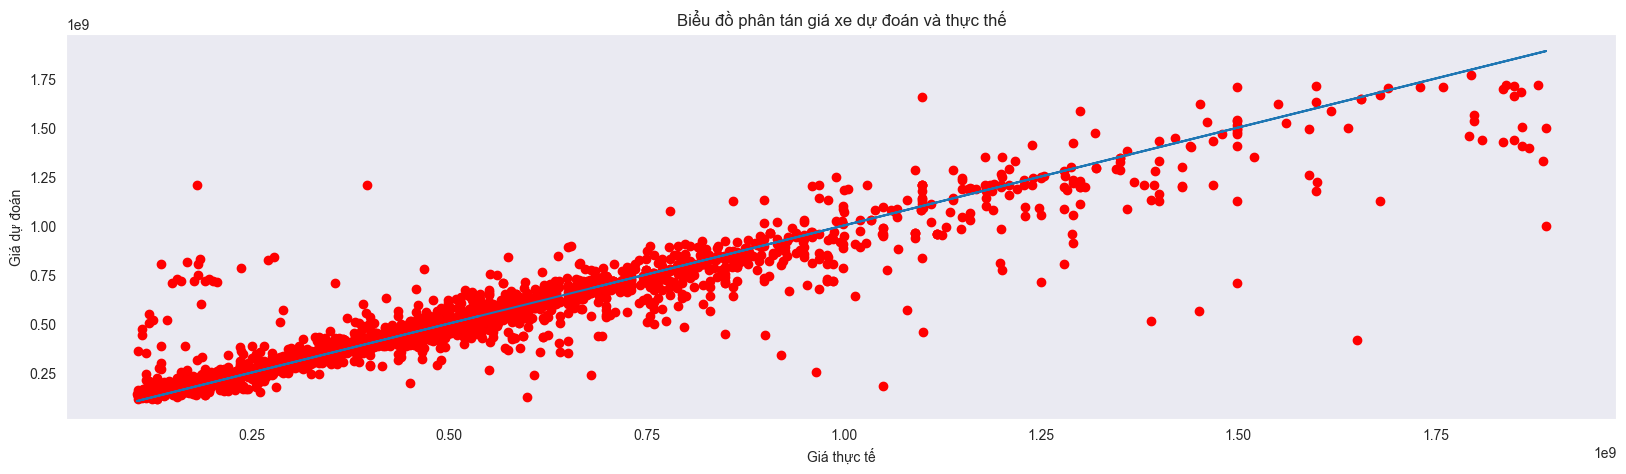

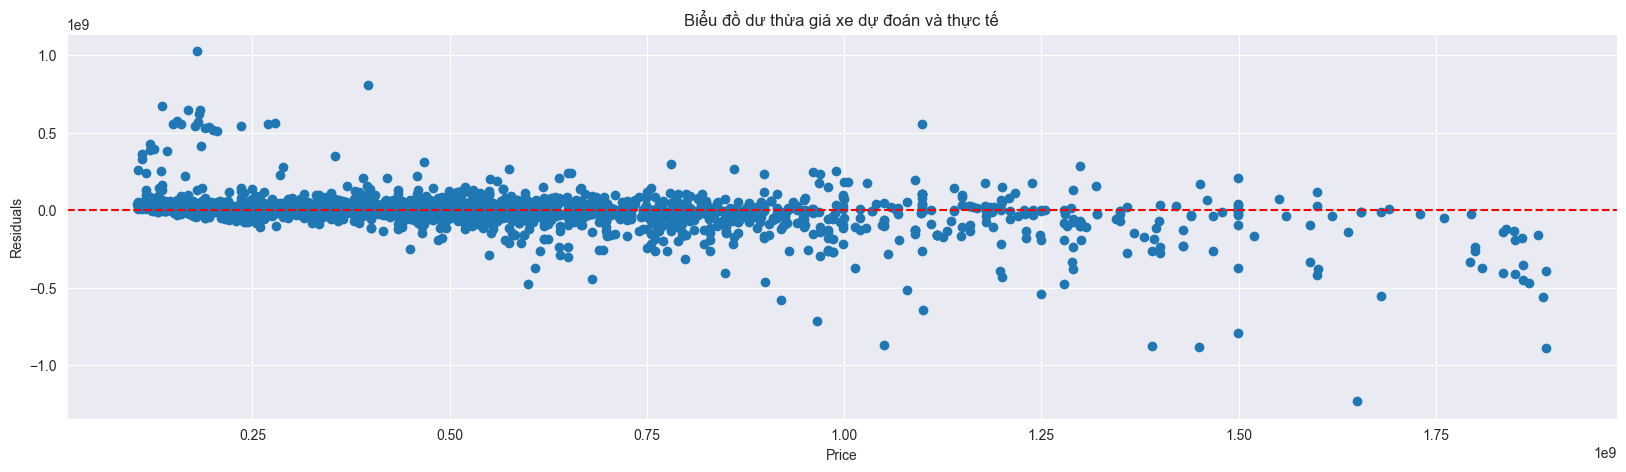

In [8]:

model = RandomForestRegressor(**grid_search.best_params_)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
score_mae = mean_absolute_error(y_test, y_pred)
score_rmse = math.sqrt(mean_squared_error(y_test, y_pred))
score_mape = mean_absolute_percentage_error(y_test, y_pred)
score_r2 = r2_score(y_test, y_pred)

print(f"MAE: {score_mae:.05f}")
print(f"RMSE: {score_rmse:.05f}")
print(f"MAPE: {score_mape:.05f}")
print(f"R2_SQUARE: {score_r2:.05f}")

# Plot line chart
def plot_line(width, height, y_pred, y_test):
    f, ax = plt.subplots(1)
    f.set_figheight(height)
    f.set_figwidth(width)
    sns.lineplot(x=range(0, X_test[0:100].shape[0]), y=y_pred[0:100], ax=ax, color='red', label='Giá trị dự đoán')
    sns.lineplot(x=range(0, X_test[0:100].shape[0]), y=y_test[0:100], ax=ax, color='green', label='Giá trị thực tế')
    ax.set_title('Biểu đồ đường giá xe dự đoán và thực thế')
    ax.set_xlabel(xlabel='Sample', fontsize=14)
    ax.set_ylabel(ylabel='Price', fontsize=14)
    plt.show()

plot_line(20, 5, y_pred, y_test)

# Plot scatter chart
def plot_scatter(width, height, y_pred, y_test):
    f, ax = plt.subplots(1)
    f.set_figheight(height)
    f.set_figwidth(width)
    plt.scatter(y_test, y_pred, color='red')
    plt.plot(y_test, y_test)
    plt.grid()
    plt.xlabel('Giá thực tế')
    plt.ylabel('Giá dự đoán')
    plt.title('Biểu đồ phân tán giá xe dự đoán và thực thế')
    plt.show()

plot_scatter(20, 5, y_pred, y_test)

# Plot residuals
def plot_residuals(width, height, y_pred, y_test):
    f, ax = plt.subplots(1)
    f.set_figheight(height)
    f.set_figwidth(width)
    residuals = y_pred - y_test

    # Vẽ biểu đồ Residuals
    plt.scatter(y_test, residuals)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Price')
    plt.ylabel('Residuals')
    plt.title('Biểu đồ dư thừa giá xe dự đoán và thực tế')
    plt.show()

plot_residuals(20, 5, y_pred, y_test)

In [9]:
joblib.dump(model, 'models/random_forest_model.pkl')

['models/random_forest_model.pkl']